# Homework 09
This homework is based on the classification and regression lectures.

## Question 1
#### In the table below, fill in the definition column with a short (no more than two sentence) definition for each vocab word. If it can be summarized by a formula, give the formula. 

| Vocab Word | Definition |
|:--------|:--------|
| **One-hot coding** | converts each category of a categorical variable into a separate binary (0/1) column |
| **Feature selection*** | restricting regression to the most important variables |
| **Classifier** | a model that assigns inputs to categories (classes) instead of predicting numeric values |
| **Precision** | (true positives)/(true positives + false positives) |
| **Recall** | (true positives)/(true positives + false negatives) |
| **F1 Score** | 2((precision x recall)/(precision + recall)) |
| **Parsimonious model** | a model that is as simple as possible while still explaining the data |
| **Ridge regression** | addresses the issue of large least squares by adding a penalty term to the cost function, leading to shrinkage of all coefficients towards zero without eliminating any |
| **LASSO regression** | breaks the rotational symmetry of the squared penalty term and tends to force coefficients to zero one at a time rather than just constraining the total coefficient sum. Results in removing some coefficients from the model and a more interpretable equation |
| **Cross validation** | a method to split the data set into trains and test the set |
| **Tree based methods** | series of questions about independent variables that breaks data down in smaller pieces for which the problems could be easier to solve  |

*Just give the general idea.

## Question 2 
#### a) What shape does a perfect classifier look like on an ROC curve? What about a bad classifier?
#### b) Think about the formula for an F1 score. What does it mean when the F1 score is close to 1? Close to 0?

a) a perfect classifier looks like a rectangle. A bad classifier looks like the line y=x

b) If the F1 score is close to 1 that means that precision and recall are balanced and that false positives and false negatives are minimized. If it is close to 0, it means that there is a trade-off between precision and recall, and it is not good at balancing the two

## Question 3
#### Compare the following aspects of linear vs. logistic regression.
|  | Linear | Logistic |
|:--------|:--------|:--------|
| **Chart Shape** | Line | S-shaped |
| **Dependent Variable Type** | continuous | categorical (binary) |
| **Purpose** (regression or classification) | Regression | Classification  |
| **Range of output variable** ($y_i$ or $p_i$) | $y_i$: (-∞ , +∞)  | $p_i$: (0,1) |
| **Method*** | ordinary least squares | maximum likelihood estimation |
| **Example of use** | Predicting HDL count based on hours of exercise | Predicting low HDL (yes or no) based on hours of exercise |  
  
*Meaning ordinary least squares or maximum likelihood estimation

## Question 4
#### Why is it important to train then test our model? How do we do that? (2-3 sentences. Not looking for code, just general explanation).

This is important because we want the model to predict based on new data drawn from the same distribution. When we don't train then test, the model has already seen all the observations, you risk overfitting, and you have no information for how it generalizes to new data. The way you can do this is to split the data (after cleaning and scaling) into testing and training. Then you can fit the model on the training data only, predict on test data, and create a predicted vs actual plot. 

## Question 5
This question runs through a linear regression example. We want to predict median house value based on the other variables.
#### a) First, load the `housing.csv` data set. Look at the data in some useful way. Why is linear regression appropriate here?

In [30]:
library(tidyverse)
setwd('C:/Users/keert/BIOS512/R_datasets')
housing <- read_csv('housing.csv')
library(dplyr)
glimpse(housing)
head(housing, n=10)

Rows: 20640 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (8): longitude, latitude, housing_median_age, total_rooms, population, h...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 20,640
Columns: 8
$ longitude          <dbl> -122.23, -122.22, -122.24, -122.25, -122.25, -122.2…
$ latitude           <dbl> 37.88, 37.86, 37.85, 37.85, 37.85, 37.85, 37.84, 37…
$ housing_median_age <dbl> 41, 21, 52, 52, 52, 52, 52, 52, 42, 52, 52, 52, 52,…
$ total_rooms        <dbl> 880, 7099, 1467, 1274, 1627, 919, 2535, 3104, 2555,…
$ population         <dbl> 322, 2401, 496, 558, 565, 413, 1094, 1157, 1206, 15…
$ households         <dbl> 126, 1138, 177, 219, 259, 193, 514, 647, 595, 714, …
$ median_income      <dbl> 8.3252, 8.3014, 7.2574, 5.6431, 3.8462, 4.0368, 3.6…
$ median_house_value <dbl> 452600, 358500, 352100, 341300, 342200, 269700, 299…


longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-122.23,37.88,41,880,322,126,8.3252,452600
-122.22,37.86,21,7099,2401,1138,8.3014,358500
-122.24,37.85,52,1467,496,177,7.2574,352100
-122.25,37.85,52,1274,558,219,5.6431,341300
-122.25,37.85,52,1627,565,259,3.8462,342200
-122.25,37.85,52,919,413,193,4.0368,269700
-122.25,37.84,52,2535,1094,514,3.6591,299200
-122.25,37.84,52,3104,1157,647,3.1200,241400
-122.26,37.84,42,2555,1206,595,2.0804,226700


linear regression is appropriate here because the variables are continuous

#### b) Scale data and split it 75/25 training/testing. Set seed = 123.

In [5]:
scale <- function(a){
  (a - min(a))/(max(a)-min(a))
}

housing_num <- housing %>% select(where(is.numeric)) %>%
  mutate(across(where(is.numeric), scale))

set.seed(123)
train <- runif(nrow(housing_num)) < 0.75
test <- !train

#### c) Fit the model.

In [11]:
f = median_house_value ~ longitude + latitude + housing_median_age + total_rooms + population + households + 
median_income
m <- lm(f, data=housing_num %>% filter(train))
summary(m)


Call:
lm(formula = f, data = housing_num %>% filter(train))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.11495 -0.09080 -0.02335  0.06400  1.00888 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.728806   0.015356   47.46   <2e-16 ***
longitude          -0.868215   0.016894  -51.39   <2e-16 ***
latitude           -0.817586   0.015007  -54.48   <2e-16 ***
housing_median_age  0.122501   0.005194   23.59   <2e-16 ***
total_rooms        -0.065063   0.065076   -1.00    0.317    
population         -3.526248   0.092512  -38.12   <2e-16 ***
households          1.967049   0.062952   31.25   <2e-16 ***
median_income       1.143536   0.010837  105.52   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1425 on 15556 degrees of freedom
Multiple R-squared:  0.6399,	Adjusted R-squared:  0.6397 
F-statistic:  3948 on 7 and 15556 DF,  p-value: < 2.2e-16


#### d) Make predictions on test data and show them in an actual vs. predicted plot.

Warning message in geom_segment(aes(x = 0, y = 0, xend = 1, yend = 1), color = "blue"):
"All aesthetics have length 1, but the data has 5076 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row."


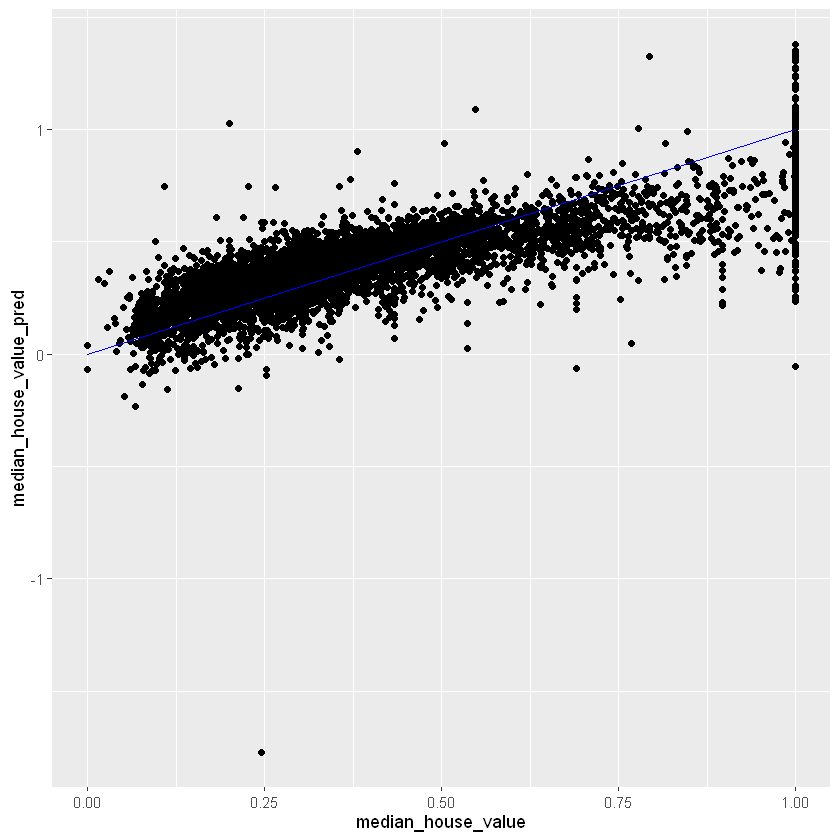

In [15]:
dx <- housing_num %>% filter(test)

dx <- dx %>% 
  mutate(median_house_value_pred = predict(m, dx %>% as.data.frame()))

#actual vs predicted plot:
ggplot(dx, aes(median_house_value, median_house_value_pred)) + geom_point() + geom_segment(aes(x=0,y=0,xend=1,yend=1), color = 'blue')

#### e) Make a residuals plot.

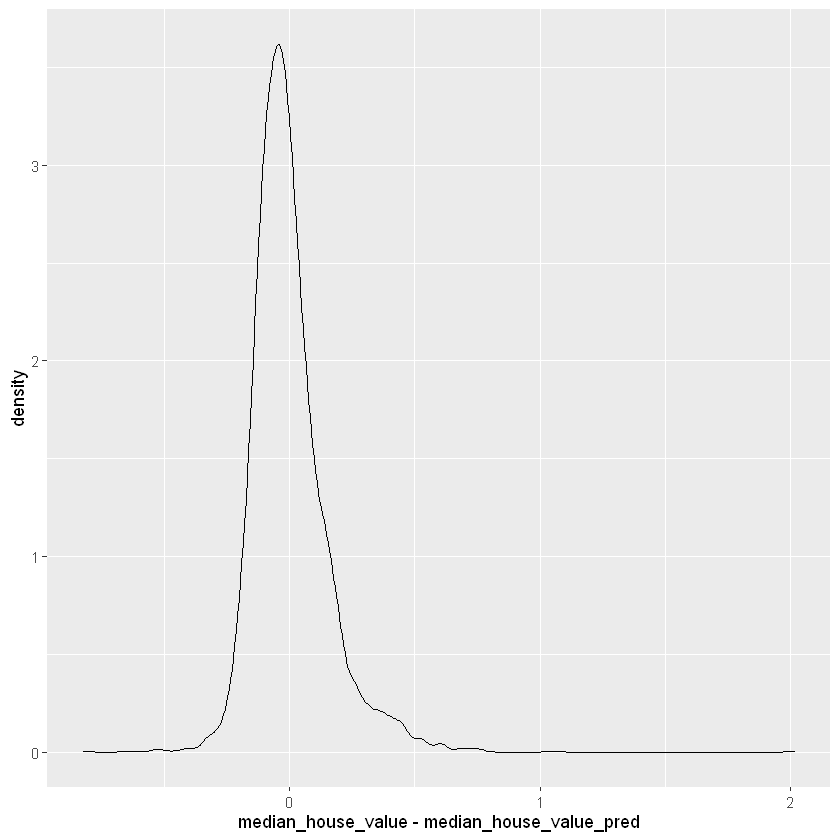

In [14]:
ggplot(dx, aes(median_house_value-median_house_value_pred)) + geom_density()

## Question 6
This question runs through a logistic regression example. We want to predict diabetes diagnosis based on the other variables. 
#### a) First, load the `diabetes.csv` data set. Look at the data in some useful way. Why is logistic regression appropriate here?

In [55]:
diabetes <- read_csv('diabetes.csv')
glimpse(diabetes)
head(diabetes, n=10)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 768
Columns: 9
$ Pregnancies              <dbl> 6, 1, 8, 1, 0, 5, 3, 10, 2, 8, 4, 10, 10, 1, …
$ Glucose                  <dbl> 148, 85, 183, 89, 137, 116, 78, 115, 197, 125…
$ BloodPressure            <dbl> 72, 66, 64, 66, 40, 74, 50, 0, 70, 96, 92, 74…
$ SkinThickness            <dbl> 35, 29, 0, 23, 35, 0, 32, 0, 45, 0, 0, 0, 0, …
$ Insulin                  <dbl> 0, 0, 0, 94, 168, 0, 88, 0, 543, 0, 0, 0, 0, …
$ BMI                      <dbl> 33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31.0, 35.…
$ DiabetesPedigreeFunction <dbl> 0.627, 0.351, 0.672, 0.167, 2.288, 0.201, 0.2…
$ Age                      <dbl> 50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 30, 3…
$ Outcome                  <dbl> 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, …


Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0
3,78,50,32,88,31.0,0.248,26,1
10,115,0,0,0,35.3,0.134,29,0
2,197,70,45,543,30.5,0.158,53,1


Logistic regression is appropriate here because the outcome variable is binary

#### b) Scale data and split it 75/25 training/testing. Set seed = 123.

In [56]:
scale <- function(x){
  (x - min(x)) / (max(x) - min(x))
}

d <- diabetes %>% as_tibble() %>% filter(complete.cases(.)) %>%
  mutate(across(where(is.numeric), scale)) 

set.seed(123)
n <- nrow(d)
train_idx <- sample.int(n, size = floor(0.75 * n))
d_train <- d %>% slice(train_idx)
d_test  <- d %>% slice(setdiff(seq_len(n), train_idx))

d_train %>% write_csv("diabetes_train.csv") 
d_test %>% write_csv("diabetes_test.csv")

#### c) Fit the model.

In [57]:
f <- Outcome ~ Pregnancies + Glucose + BloodPressure + SkinThickness + Insulin + BMI + DiabetesPedigreeFunction + 
Age
m <- glm(f, data = d_train, family = binomial())

summary(m)

saveRDS(m, "outcome.rds")


Call:
glm(formula = f, family = binomial(), data = d_train)

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)               -8.0501     0.7875 -10.223  < 2e-16 ***
Pregnancies                1.9808     0.6376   3.107  0.00189 ** 
Glucose                    7.3239     0.8832   8.293  < 2e-16 ***
BloodPressure             -1.6659     0.7236  -2.302  0.02131 *  
SkinThickness              0.4781     0.7778   0.615  0.53875    
Insulin                   -1.1441     0.8556  -1.337  0.18117    
BMI                        5.7136     1.1584   4.932 8.12e-07 ***
DiabetesPedigreeFunction   1.6852     0.7724   2.182  0.02912 *  
Age                        0.9522     0.6526   1.459  0.14456    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 745.11  on 575  degrees of freedom
Residual deviance: 538.57  on 567  degrees of freedom
AIC: 556.57

Number of Fisher 

#### d) Make predictions on test data. Print a table with the number of true positives, false positives, true negatives, false negatives, and accuracy. 

In [58]:
accuracy <- read_csv("diabetes_test.csv", show_col_types = FALSE)
r <- readRDS("outcome.rds")

p <- predict(m, newdata = accuracy, type = "response")
pred <- as.integer(p >= 0.5)
truth <- accuracy$Outcome

tp <- sum(pred == 1 & truth == 1)
fp <- sum(pred == 1 & truth == 0)
tn <- sum(pred == 0 & truth == 0)
fn <- sum(pred == 0 & truth == 1)
acc <- (tp + tn) / (tp + fp + tn + fn)

df <- tibble(
  measure = c("True Positive", "False Positive", "True Negative", "False Negative", "Accuracy"),
  value   = c(tp, fp, tn, fn, acc)
)

df

measure,value
<chr>,<dbl>
True Positive,36.0000000
False Positive,13.0000000
True Negative,112.0000000
False Negative,31.0000000
Accuracy,0.7708333


#### e) Fit a LASSO-regularized logistic regression model. Again, set seed = 123. Which variables are the most important (which ones don't go to zero)? How does the LASSO model affect the accuracy?

In [59]:
install.packages("glmnet")
library(glmnet)
set.seed(123)
y <- d_train$Outcome
X <- model.matrix(Outcome ~ ., d_train)[, -1]
cvfit <- cv.glmnet(X, y, alpha = 1)
fit <- cvfit$glmnet.fit


best_fit <- glmnet(X,y,lambda=cvfit$lambda.min)
best_fit$beta

Warning message:
"package 'glmnet' is in use and will not be installed"


8 x 1 sparse Matrix of class "dgCMatrix"
                                  s0
Pregnancies               0.32575963
Glucose                   1.19460091
BloodPressure            -0.26357388
SkinThickness             0.04684074
Insulin                  -0.10922199
BMI                       0.88001350
DiabetesPedigreeFunction  0.24207492
Age                       0.16378815

The variables that seem most important are glucose and BMI. Lasso model increases accuracy.

#### f) Make a plot of actual vs. predicted values for the LASSO model.

`geom_smooth()` using formula = 'y ~ x'


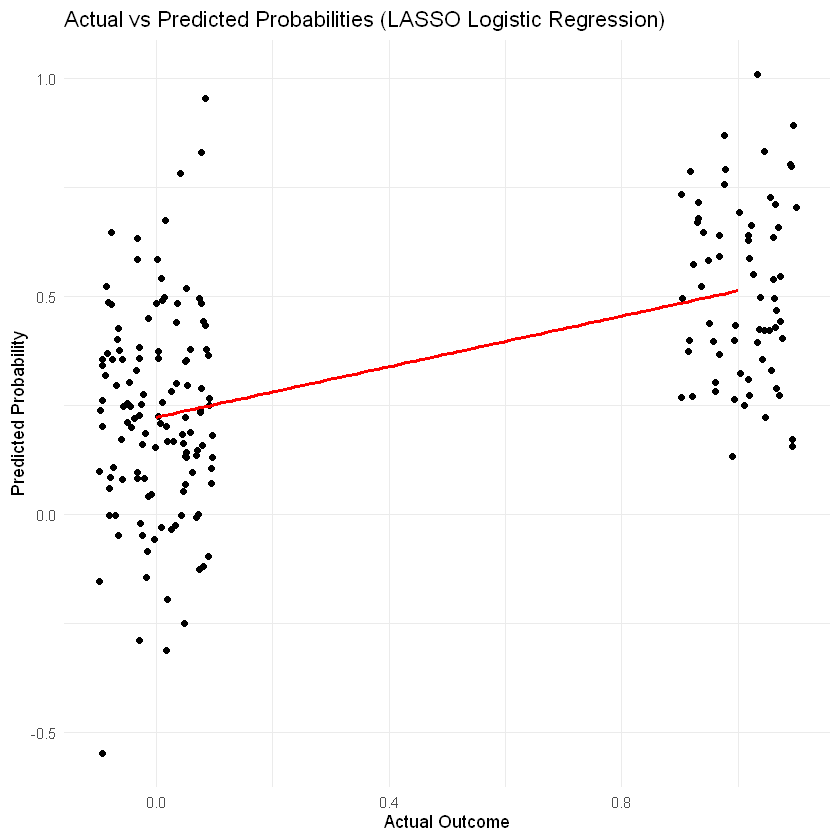

In [61]:
y_test <- d_test$Outcome
X_test <- model.matrix(Outcome ~ ., d_test)[, -1]

pred_probs <- predict(best_fit, newx = X_test, type = "response")
results <- tibble(
  actual = y_test,           
  predicted_prob = as.vector(pred_probs)
)
library(ggplot2)

ggplot(results, aes(x = actual, y = predicted_prob)) +
  geom_jitter(width = 0.1, height = 0) +   
  geom_smooth(method = "lm", se = FALSE, color = "red") +  
  labs(
    x = "Actual Outcome",
    y = "Predicted Probability",
    title = "Actual vs Predicted Probabilities (LASSO Logistic Regression)"
  ) +
  theme_minimal()